In [2]:
import numpy as np

In [36]:
def Knn_Predict(input:np.ndarray,neighbors:int,X:np.ndarray,y):
    '''
        The KNN prediction
        
        Parameters:
        input: a vector which contains the information on a single data point
        X: A numpy matrix where each row is a single training example with it's class as the last value
        neighbors: number of neighbors to consider
        distanc_function: the distance formula to compare input with each training example
    '''
    #distances from input

    distances = [((input-x)**2).sum() for x in X]
    #find closest points
    shortest = np.argsort(distances)[:neighbors]
    #find majority class among closest points
    classes = y[shortest]
    vals, cts = np.unique(classes,return_counts=True)
    #proportions
    total = np.sum(cts)
    return {val:ct/total for val,ct in zip(vals,cts)}

In [37]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
dataset = load_breast_cancer()

In [38]:
data = dataset['data']
target = dataset['target']

data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [43]:
knn = [Knn_Predict(input=x,neighbors=5,X=data_train,y=target_train) for x in data_train]

In [44]:
knn

[{1: 1.0},
 {0: 1.0},
 {1: 1.0},
 {1: 1.0},
 {1: 1.0},
 {0: 1.0},
 {0: 0.2, 1: 0.8},
 {1: 1.0},
 {1: 1.0},
 {0: 1.0},
 {1: 1.0},
 {0: 1.0},
 {0: 1.0},
 {1: 1.0},
 {1: 1.0},
 {0: 1.0},
 {0: 1.0},
 {0: 0.6, 1: 0.4},
 {0: 0.4, 1: 0.6},
 {1: 1.0},
 {0: 0.6, 1: 0.4},
 {0: 1.0},
 {1: 1.0},
 {1: 1.0},
 {0: 0.4, 1: 0.6},
 {0: 1.0},
 {1: 1.0},
 {0: 1.0},
 {1: 1.0},
 {1: 1.0},
 {0: 0.6, 1: 0.4},
 {1: 1.0},
 {0: 1.0},
 {0: 1.0},
 {0: 0.8, 1: 0.2},
 {1: 1.0},
 {0: 1.0},
 {1: 1.0},
 {1: 1.0},
 {1: 1.0},
 {1: 1.0},
 {0: 1.0},
 {0: 1.0},
 {1: 1.0},
 {0: 0.2, 1: 0.8},
 {1: 1.0},
 {1: 1.0},
 {1: 1.0},
 {1: 1.0},
 {1: 1.0},
 {0: 0.8, 1: 0.2},
 {1: 1.0},
 {1: 1.0},
 {1: 1.0},
 {1: 1.0},
 {0: 0.8, 1: 0.2},
 {1: 1.0},
 {1: 1.0},
 {1: 1.0},
 {0: 0.2, 1: 0.8},
 {1: 1.0},
 {0: 0.2, 1: 0.8},
 {0: 1.0},
 {1: 1.0},
 {1: 1.0},
 {0: 0.2, 1: 0.8},
 {1: 1.0},
 {1: 1.0},
 {1: 1.0},
 {0: 1.0},
 {0: 1.0},
 {0: 1.0},
 {0: 0.4, 1: 0.6},
 {1: 1.0},
 {0: 1.0},
 {0: 0.2, 1: 0.8},
 {0: 1.0},
 {1: 1.0},
 {1: 1.0},
 {1: 1.0},


Lets do an elbow plot!

In [75]:
y = []
for i in range(1,10):
    predictions = [Knn_Predict(input=x,neighbors=i,X=data_train,y=target_train) for x in data_train]
    total = []
    for pred in predictions:
        if 1 in pred:
            if 0 in pred:
                total.append(int(pred[1]>pred[0]))
            else:
                total.append(1)
        else:
            total.append(0)


    accuracy = np.array([t==test for t,test in zip(total,target_train)]).sum()/len(target_train)
    y.append(accuracy)

In [71]:
import matplotlib.pyplot as plt

In [76]:
y

[1.0,
 0.9648351648351648,
 0.9494505494505494,
 0.9494505494505494,
 0.9406593406593406,
 0.9362637362637363,
 0.9406593406593406,
 0.9384615384615385,
 0.9318681318681319]

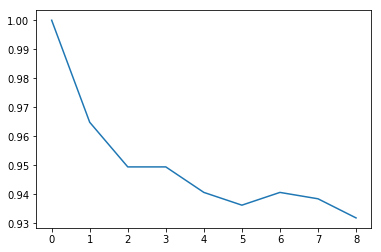

In [77]:
plt.plot(y)

What an elbow!